In [ ]:
import tensorflow as tf
from tensorflow. keras import datasets, layers, models 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data ()

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train. reshape (-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test. reshape (-1,)

In [ ]:
classes = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize= (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes [y [index]])

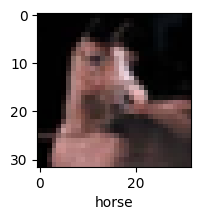

In [ ]:
plot_sample(X_train, y_train, 85)

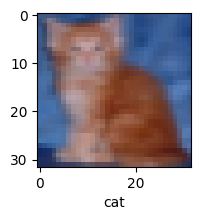

In [ ]:
plot_sample(X_train, y_train, 91)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
ann = models. Sequential ([
        layers.Flatten(input_shape= (32,32,3)), 
        layers.Dense (3000, activation='relu'), 
        layers.Dense (1000, activation='relu'), 
        layers.Dense (10, activation='softmax')
        ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy' ])

ann.fit (X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.8128 - accuracy: 0.3528
Epoch 2/5
1563/1563 [==============================] - 161s 103ms/step - loss: 1.6229 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5415 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.4814 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.4316 - accuracy: 0.4952


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 32ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.64      0.42      0.51      1000
           1       0.66      0.55      0.60      1000
           2       0.51      0.16      0.25      1000
           3       0.36      0.31      0.33      1000
           4       0.40      0.49      0.44      1000
           5       0.37      0.41      0.39      1000
           6       0.51      0.57      0.54      1000
           7       0.50      0.61      0.55      1000
           8       0.50      0.75      0.60      1000
           9       0.53      0.61      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix for ANN')

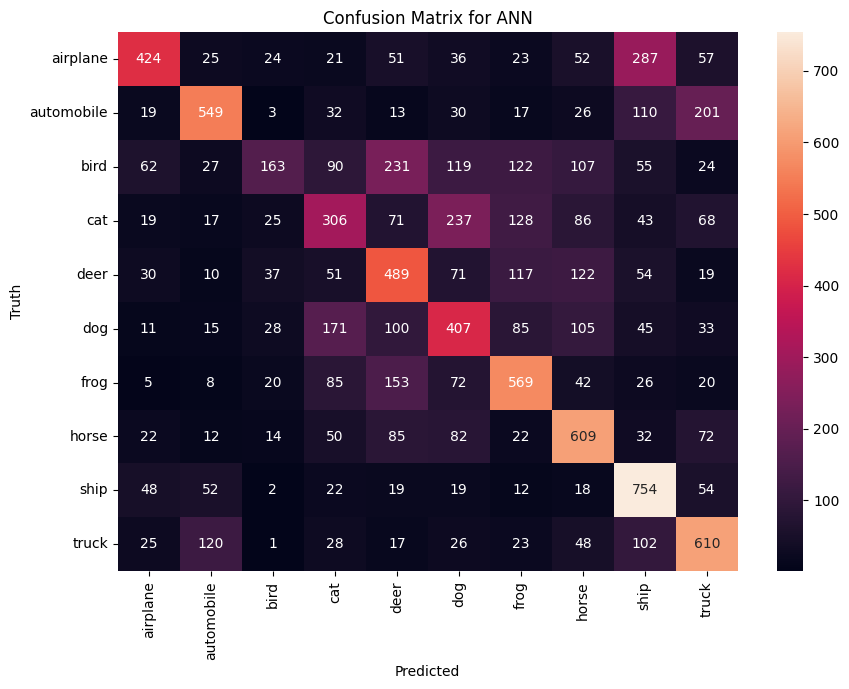

In [ ]:

y_pred_classes = [np.argmax(element) for element in y_pred]




class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for ANN')



In [ ]:
cnn = models. Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape= (32, 32, 3)), 
        layers.MaxPooling2D ((2, 2)),

        layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers. Flatten (), 
        layers. Dense (64, activation='relu'), 
        layers. Dense (10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4887 - accuracy: 0.4648
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1055 - accuracy: 0.6143
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9830 - accuracy: 0.6588
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9060 - accuracy: 0.6852
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8416 - accuracy: 0.7071
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7884 - accuracy: 0.7256
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7431 - accuracy: 0.7421
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7037 - accuracy: 0.7551
Epoch 9/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6614 - accuracy: 0.7690
Epoch 10/10
1563/1563 [==============================] - 72s 46m

In [ ]:
cnn.evaluate (X_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9645 - accuracy: 0.6828


[0.9644904136657715, 0.6827999949455261]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[3.2353557e-03, 3.6213917e-04, 1.9098587e-03, 7.8176761e-01,
        1.2432240e-03, 1.2853035e-01, 6.8042934e-02, 3.4996582e-04,
        9.4896033e-03, 5.0689564e-03],
       [3.8796704e-02, 8.9126062e-01, 6.5435197e-05, 1.3860896e-05,
        1.4546335e-05, 8.2869190e-07, 3.8073198e-05, 7.1529911e-08,
        6.6874169e-02, 2.9357178e-03],
       [3.2183266e-01, 1.5312468e-01, 2.3843057e-02, 1.0037000e-02,
        3.9686258e-03, 9.4623986e-04, 6.3429866e-03, 1.8347468e-03,
        3.1580582e-01, 1.6226420e-01],
       [9.4702846e-01, 2.6936121e-02, 3.4767170e-03, 4.7871652e-03,
        1.0077292e-03, 4.9451071e-05, 1.0097335e-03, 7.2266528e-04,
        8.5750353e-03, 6.4069983e-03],
       [4.1522509e-07, 7.6486958e-07, 2.8703096e-03, 3.6312342e-02,
        1.1000414e-01, 4.9429329e-04, 8.5030639e-01, 1.1012531e-05,
        1.6425359e-07, 9.4897281e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes [:5]

[3, 1, 0, 0, 6]

Text(0.5, 1.0, 'Confusion Matrix for CNN')

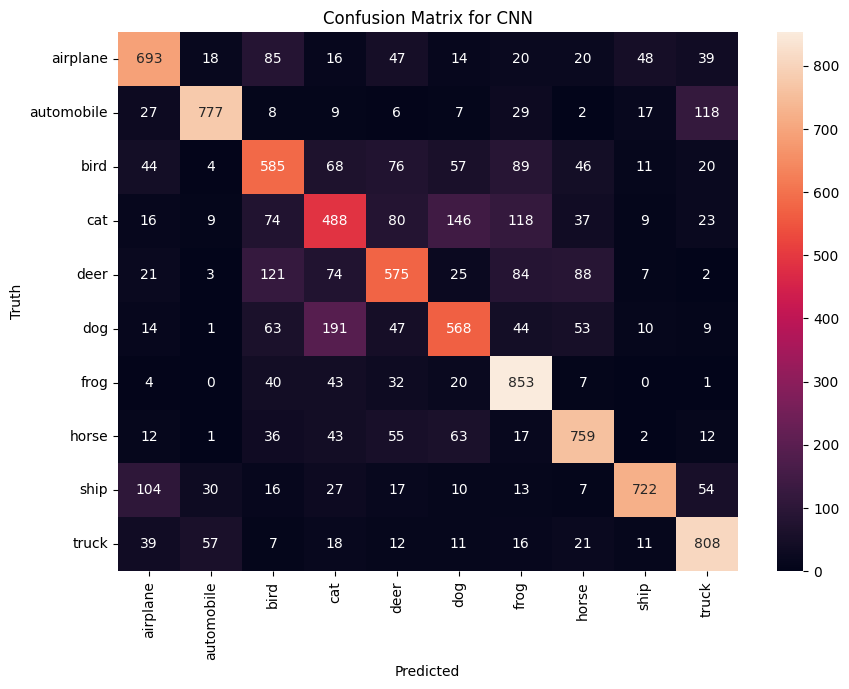

In [ ]:


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for CNN')



In [ ]:
print("Classification Report: \n", classification_report (y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      1000
           1       0.86      0.78      0.82      1000
           2       0.57      0.58      0.57      1000
           3       0.50      0.49      0.49      1000
           4       0.61      0.57      0.59      1000
           5       0.62      0.57      0.59      1000
           6       0.66      0.85      0.75      1000
           7       0.73      0.76      0.74      1000
           8       0.86      0.72      0.79      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [94]:
y_classes [:5]

[3, 1, 0, 0, 6]

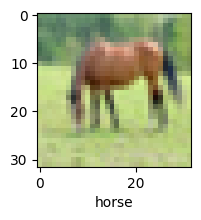

In [92]:
plot_sample(X_test, y_test, 60)

In [93]:
classes [y_classes [60]]

'horse'